In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
student=pd.read_csv("Private_data.csv")

In [3]:
#reading the dataset
student.head()


,Unnamed: 0,NAME OF THE STUDENT,UNIVERSITY,PROGRAM NAME,Specialisation,SEMESTER,Domain,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50),TOTAL SCORE (OUT of 100),RANK,PERCENTILE
0,0,Camila Wood,"Stanford University, USA",B.Com,Honours,5th,Finance,50,50,100,1,1.000000
1,1,Alexander Thompson,"Stanford University, USA",B.Com,Financial Services,5th,Finance,50,50,100,2,0.993377
2,2,Liam Taylor,"Harvard University, USA",B.Com,Accounting Analytics,5th,BA,50,50,100,3,0.986755
3,3,Evelyn Jenkins,"Stanford University, USA",B.Com,Honours,5th,Finance,49,50,99,4,0.980132
4,4,Michael Jackson,"Harvard University, USA",MBA,International Business,3rd,IB,50,49,99,5,0.973510


In [4]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            151 non-null    int64  
 1   NAME OF THE STUDENT                   151 non-null    object 
 2   UNIVERSITY                            151 non-null    object 
 3   PROGRAM NAME                          151 non-null    object 
 4   Specialisation                        151 non-null    object 
 5   SEMESTER                              151 non-null    object 
 6   Domain                                151 non-null    object 
 7   GENERAL MANAGEMENT SCORE (OUT of 50)  151 non-null    int64  
 8   Domain Specific SCORE (OUT 50)        151 non-null    int64  
 9   TOTAL SCORE (OUT of 100)              151 non-null    int64  
 10  RANK                                  151 non-null    int64  
 11  PERCENTILE         

In [5]:
#dropping the unnamed column
student.drop(["Unnamed: 0"], axis=1 , inplace =True)

In [6]:
# setting the column rank as the primary key
student=student.set_index("RANK")

In [7]:
student.columns

Index(['NAME OF THE STUDENT', 'UNIVERSITY', 'PROGRAM NAME', 'Specialisation',
       'SEMESTER', 'Domain', 'GENERAL MANAGEMENT SCORE (OUT of 50)',
       'Domain Specific SCORE (OUT 50)', 'TOTAL SCORE (OUT of 100)',
       'PERCENTILE'],
      dtype='object')

In [8]:
student.describe()

,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50),TOTAL SCORE (OUT of 100),PERCENTILE
count,151.000000,151.000000,151.000000,151.000000
mean,37.993377,33.635762,71.629139,0.503311
std,10.734056,11.866751,21.200823,0.289629
min,4.000000,1.000000,5.000000,0.006623
25%,32.500000,27.000000,62.000000,0.254967
50%,40.000000,36.000000,74.000000,0.503311
75%,47.000000,43.000000,89.000000,0.751656
max,50.000000,50.000000,100.000000,1.000000


In [9]:
student.shape

(151, 10)

In [10]:
#number of unique values
student["PROGRAM NAME"].nunique()

4

In [11]:
student["PROGRAM NAME"].value_counts()

PROGRAM NAME
MBA              57
BBA              44
B.Com            37
Intg. BBA+MBA    13
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_20432\2220169841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="PROGRAM NAME" , data= student , palette="ocean")


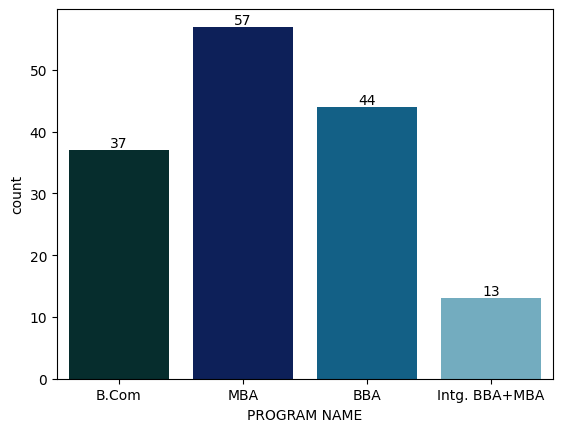

In [12]:
#plotting the count of the program name 
ax=sns.countplot(x="PROGRAM NAME" , data= student , palette="ocean")
for bars in ax.containers:
    ax.bar_label(bars)




**most of the students are from MBA**




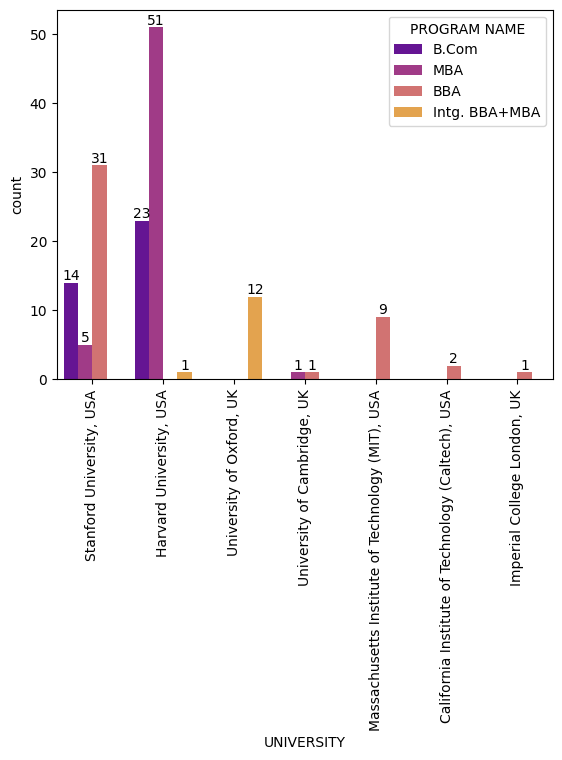

In [13]:
#finding out which university offers the different types of programs along with the count
std3= sns.countplot(x="UNIVERSITY" , hue="PROGRAM NAME" , data =student, palette="plasma")
for bars in std3.containers:
    std3.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

** HARVARD UNIVERSITY HAS THE HIGHEST NUMBER OF MBA STUDENTS**

In [14]:
#count of the universities
student["UNIVERSITY"].nunique()

7

In [15]:
#name of the different universities
student["UNIVERSITY"].unique()

array(['Stanford University, USA', 'Harvard University, USA',
       'University of Oxford, UK', 'University of Cambridge, UK',
       'Massachusetts Institute of Technology (MIT), USA',
       'California Institute of Technology (Caltech), USA',
       'Imperial College London, UK'], dtype=object)

In [16]:
#finding out the top 5 universities
temp =student["UNIVERSITY"].value_counts()[0:5]
temp1=temp.sort_index(ascending = True)
print(temp1)

UNIVERSITY
Harvard University, USA                             75
Massachusetts Institute of Technology (MIT), USA     9
Stanford University, USA                            50
University of Cambridge, UK                          2
University of Oxford, UK                            12
Name: count, dtype: int64


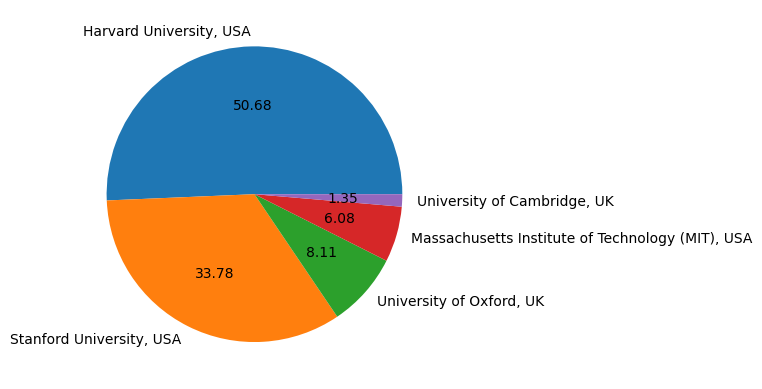

In [17]:
#plotting the top 5 unis
labels=["Harvard University, USA", "Stanford University, USA", "University of Oxford, UK","Massachusetts Institute of Technology (MIT), USA","University of Cambridge, UK"]
plt.pie(temp,labels=labels, autopct= '%.2f')
plt.show()


In [18]:
std4=student.groupby("Domain").agg({'Domain Specific SCORE (OUT 50)':'mean','GENERAL MANAGEMENT SCORE (OUT of 50)':'mean','TOTAL SCORE (OUT of 100)':'mean'})
print(std4)


         Domain Specific SCORE (OUT 50)  GENERAL MANAGEMENT SCORE (OUT of 50)  \
Domain                                                                          
BA                            37.333333                             42.761905   
DM                            30.923077                             35.000000   
E&I                           33.000000                             35.272727   
Finance                       35.756098                             37.682927   
Generic                       27.428571                             34.285714   
IB                            32.106383                             38.787234   

         TOTAL SCORE (OUT of 100)  
Domain                             
BA                      80.095238  
DM                      65.923077  
E&I                     68.272727  
Finance                 73.439024  
Generic                 61.714286  
IB                      70.893617  


<Axes: ylabel='Domain'>

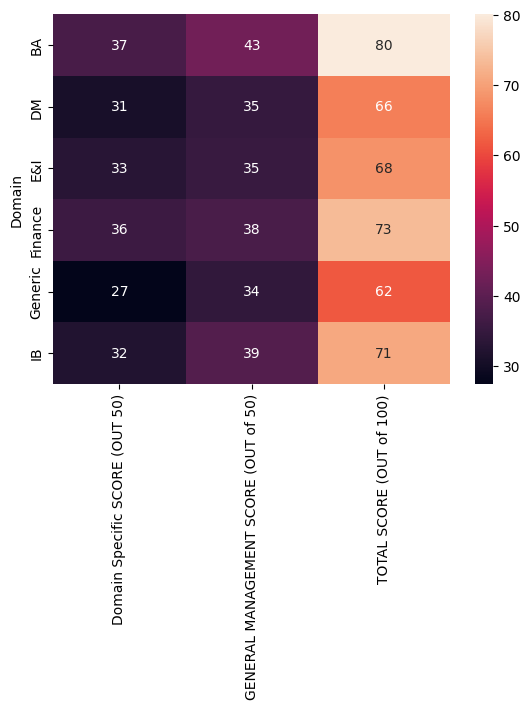

In [19]:
sns.heatmap(std4 , annot=True)

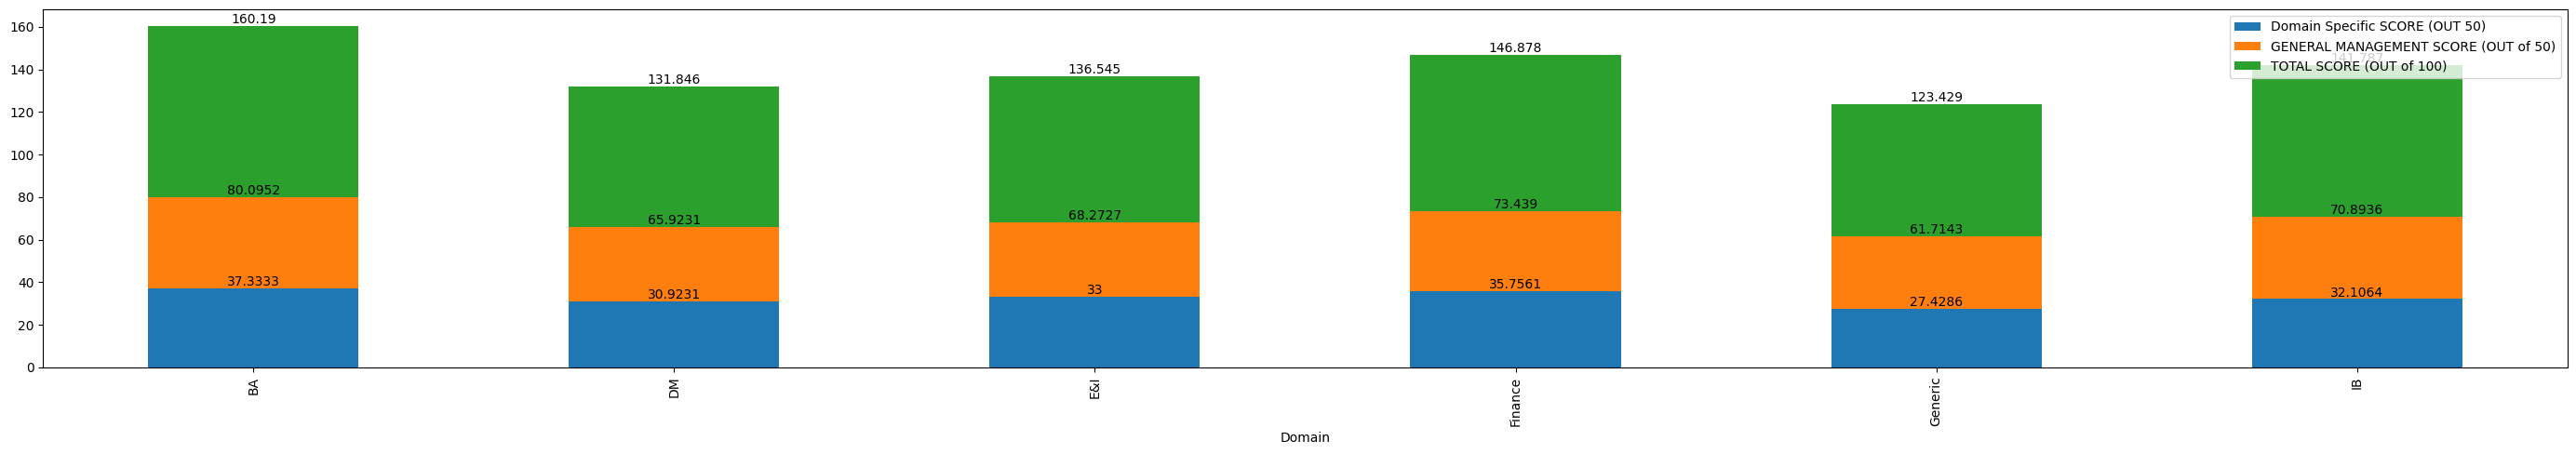

In [20]:
std5=student.groupby("Domain").agg({'Domain Specific SCORE (OUT 50)':'mean','GENERAL MANAGEMENT SCORE (OUT of 50)':'mean','TOTAL SCORE (OUT of 100)':'mean'}).plot(kind="bar", stacked=True, figsize=(35,5))
for bars in std5.containers:
    std5.bar_label(bars)

In [21]:
stdd=student.groupby("PROGRAM NAME").agg({'Domain Specific SCORE (OUT 50)':'mean','GENERAL MANAGEMENT SCORE (OUT of 50)':'mean','TOTAL SCORE (OUT of 100)':'mean'})
stdd

,Domain Specific SCORE (OUT 50),GENERAL MANAGEMENT SCORE (OUT of 50),TOTAL SCORE (OUT of 100)
PROGRAM NAME,,,
B.Com,37.675676,42.081081,79.756757
BBA,31.113636,35.340909,66.454545
Intg. BBA+MBA,32.615385,35.846154,68.461538
MBA,33.192982,37.877193,71.070175


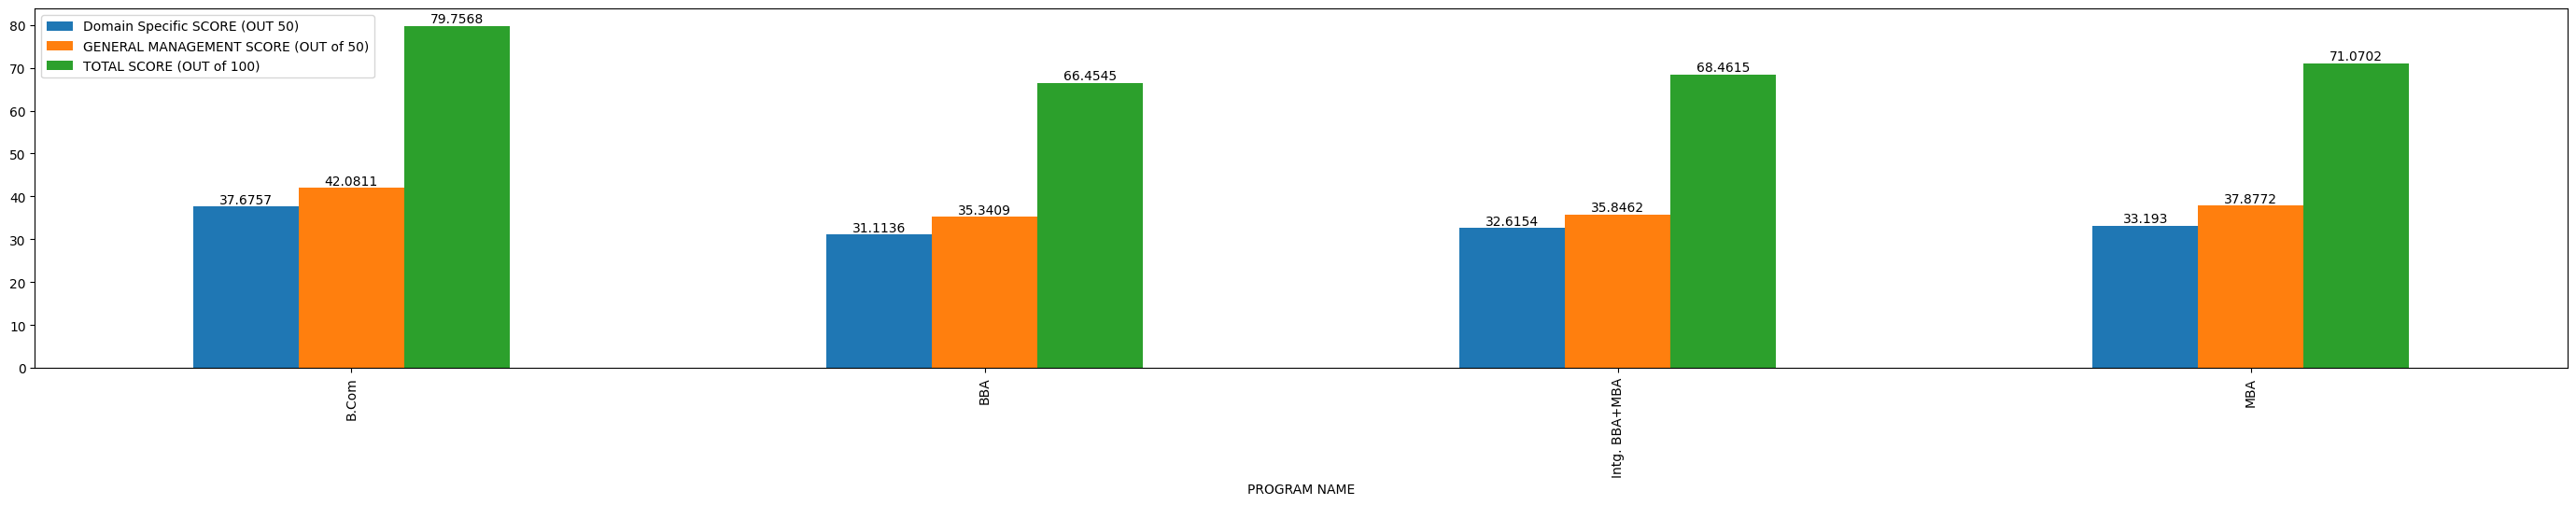

In [22]:
std6=student.groupby("PROGRAM NAME").agg({'Domain Specific SCORE (OUT 50)':'mean','GENERAL MANAGEMENT SCORE (OUT of 50)':'mean','TOTAL SCORE (OUT of 100)':'mean'}).plot(kind="bar", figsize=(35,5))
for bars in std6.containers:
    std6.bar_label(bars)